In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
# -------------------------
# 1. Homography estimation
# -------------------------

def compute_homography(image_pts, world_pts):
    """
    image_pts: Nx2 array of pixel coordinates (u,v)
    world_pts: Nx2 array of real coordinates (X,Y)
    returns: homography H (3x3 matrix)
    """
    H, mask = cv2.findHomography(image_pts, world_pts, cv2.RANSAC)
    return H

# -------------------------
# 2. Map image point -> world
# -------------------------

def map_point(H, x, y):
    """
    H: homography mapping image->world
    pt: (u, v)
    returns: (X, Y)
    """
    # Homogeneous multiplication
    p = np.array([x, y, 1.0], dtype=float)
    Pw = H @ p
    return Pw[0]/Pw[2], Pw[1]/Pw[2]


In [26]:

# Example control points
image_pts = np.array([
    [36, 25], # 0, 0
    [787, 9],
    [20, 790], # 0, 295
    [810, 795] # 295, 295
])


world_pts = np.array([
    [0.0, 0.0],
    [295.0, 0.0],
    [0.0, 295.0],
    [295.0, 295.0]
])  # meters

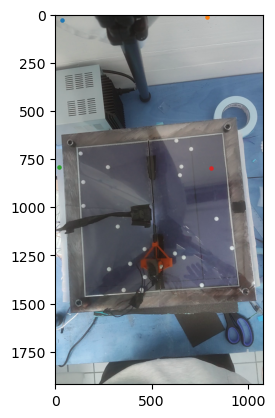

In [ ]:
video_path = '/Users/hervesv/Documents/CloudDrive/IPT/Maxwell_Demon_2025/videos/Demon Operation (27.11.)/cropped/20balls, initially off, on at 2:.mov'
cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    raise RuntimeError("Could not open video file.")

# open frame 0
ret, frame = cap.read()


plt.imshow(frame)
for x, y in image_pts:
    plt.scatter(x, y, s=5)

#plt.xlim(left=780)
#plt.ylim(bottom=20)

# automatic edge detection

1. Use Canny to detect strong edges

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


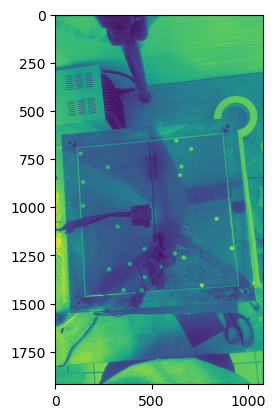

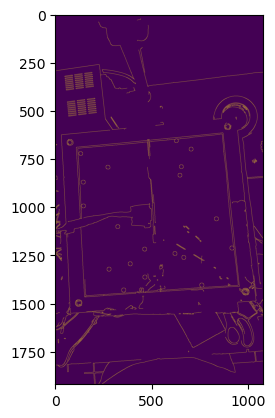

'\nblur2 = cv2.GaussianBlur(edges, (5,5), 0)\nedges2 = cv2.Canny(blur2, 50, 150)\n\nplt.imshow(edges2)\nplt.show()'

In [51]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5,5), 0)
edges = cv2.Canny(blur, 50, 150)

print(edges)

plt.imshow(gray)
plt.show()

plt.imshow(edges)
plt.show()

# finding edges a second time doesn't do much
'''
blur2 = cv2.GaussianBlur(edges, (5,5), 0)
edges2 = cv2.Canny(blur2, 50, 150)

plt.imshow(edges2)
plt.show()'''


[[[1000. 1437.]]

 [[  40. 1631.]]

 [[ 115.  450.]]

 [[  70.  518.]]

 [[ 547. 1426.]]

 [[ 109.  513.]]

 [[  71.  528.]]

 [[ 108.  503.]]

 [[ 206.  438.]]

 [[ 154.  445.]]

 [[ 105.  472.]]

 [[  55.  363.]]

 [[ 512. 1359.]]

 [[ 103.  462.]]

 [[ 214.  510.]]

 [[ 155.  455.]]

 [[ 199.  374.]]

 [[  56.  373.]]

 [[  66.  477.]]

 [[ 207.  448.]]

 [[  69.  508.]]

 [[ 102.  452.]]

 [[ 169.  453.]]

 [[ 172.  484.]]

 [[  58.  393.]]

 [[ 161.  506.]]

 [[ 110.  523.]]

 [[  64.  467.]]

 [[ 107.  493.]]

 [[  53.  343.]]

 [[  54.  353.]]

 [[ 175.  515.]]

 [[ 906. 1762.]]

 [[ 116.  460.]]

 [[ 109.  386.]]

 [[ 123.  522.]]

 [[  57.  383.]]

 [[  52.  333.]]

 [[ 106.  482.]]

 [[ 119.  491.]]

 [[ 156.  465.]]

 [[  96.  378.]]

 [[ 158.  486.]]

 [[  97.  388.]]

 [[  63.  457.]]

 [[ 167.  443.]]

 [[  67.  487.]]

 [[ 198.  364.]]

 [[  51.  323.]]

 [[ 533. 1380.]]]


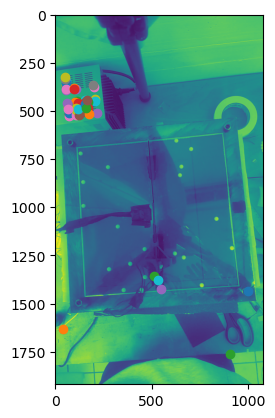

In [52]:
corners = cv2.goodFeaturesToTrack(gray, maxCorners=50, qualityLevel=0.01, minDistance=10)

print(corners)
plt.imshow(gray)
for e in corners:
    x,y = e[0][0], e[0][1]
    plt.scatter(x, y)

plt.show()

2. Hough transform to detect line segments

In [42]:
lines = cv2.HoughLinesP(
    edges,
    rho=1,
    theta=np.pi/180,
    threshold=80,
    minLineLength=50,
    maxLineGap=10
)

print(lines)

[[[501  16 622  14]]

 [[805 425 811 625]]

 [[ 25 177  28  18]]

 [[321  20 437  18]]

 [[ 36 797 278 797]]

 [[678 800 791 801]]

 [[ 53  17 359  12]]

 [[221 792 321 792]]

 [[795 290 795 343]]

 [[ 19 485  20 433]]

 [[358  11 496   9]]

 [[799 487 803 609]]

 [[ 11 789  68 790]]

 [[729 795 817 796]]

 [[408 423 408 365]]

 [[399 384 399 213]]

 [[521 793 617 793]]

 [[476 799 628 799]]

 [[137  23 188  22]]

 [[ 98 791 220 791]]

 [[795  44 796 117]]

 [[ 34 125  35  70]]

 [[800 226 802 346]]

 [[625   5 706   4]]

 [[797 118 798 187]]

 [[ 13 739  14 664]]

 [[ 16 602  18 486]]

 [[795 358 796 437]]

 [[414 798 475 798]]

 [[398  88 398   9]]

 [[408 338 408 227]]

 [[808 673 813 802]]

 [[402 295 402 216]]

 [[408 792 520 792]]

 [[172  23 314  21]]

 [[156 375 224 370]]

 [[ 45 384 178 374]]

 [[644  12 786   8]]

 [[393 499 397 428]]

 [[620 792 681 794]]

 [[ 76 421 176 389]]

 [[550   7 606   6]]]


In [33]:

def order_points(pts):
    c = np.mean(pts, axis=0)
    angles = np.arctan2(pts[:,1] - c[1], pts[:,0] - c[0])
    return pts[np.argsort(angles)]


def detect_dark_square(img):
    # grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # threshold: inside dark -> white, outside white -> black
    _, thresh = cv2.threshold(gray, 0, 255,
                              cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL,
                                   cv2.CHAIN_APPROX_SIMPLE)
    if not contours:
        return None

    # largest contour
    cnt = max(contours, key=cv2.contourArea)

    # polygonal approximation
    peri = cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, 0.02 * peri, True)

    if len(approx) != 4:
        return None  # not a quadrilateral

    # return as simple Nx2 float array
    corners = approx.reshape(4, 2).astype(float)

    # order the corners (TL, TR, BR, BL)
    return corners#order_points(corners)



In [34]:
auto_pts = detect_dark_square(frame)

print(auto_pts)

None


[[[468 803]]]


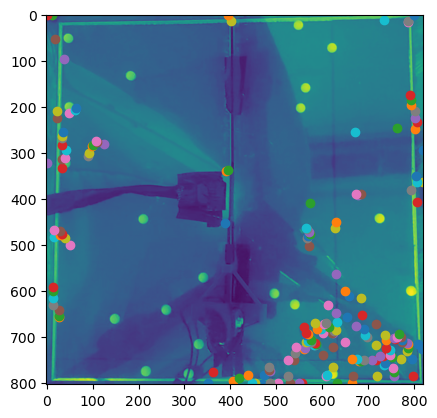

In [40]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# threshold: inside dark -> white, outside white -> black
_, thresh = cv2.threshold(gray, 0, 255,
                            cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL,
                                cv2.CHAIN_APPROX_SIMPLE)

#print(contours)

print(contours[0])

plt.imshow(gray)
for e in contours:
    x,y = e[0][0][0], e[0][0][1]
    plt.scatter(x, y)

plt.show()

In [36]:
# largest contour
cnt = max(contours, key=cv2.contourArea)

print(cnt)

[[[402  14]]

 [[402  17]]

 [[401  18]]

 ...

 [[406  18]]

 [[406  15]]

 [[405  14]]]
